In [ ]:
# وارد کردن کتابخانه های مورد نیاز برای تحلیل داده و ساخت مدل
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
# لود دیتا و نمایش اطلاعات اولیه و همبستگی
df = pd.read_csv('housing.csv')

print(df.head())

print(df.describe())

print(df.info())

# حذف ستون های غیر عددی برای نمایش همبستگی
df_int = df.drop('ocean_proximity', axis=1)

print(df_int.corr().sort_values(by='median_house_value', ascending=True))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

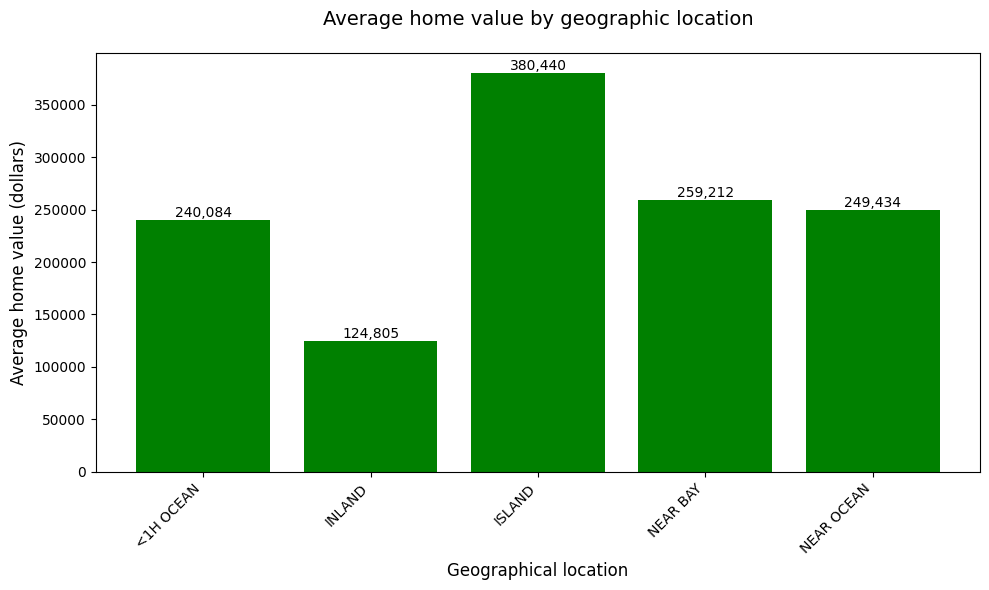

In [26]:
# محاسبه میانگین قیمت خانه بر اساس مجاورت با اقیانوس
mean_house_value_by_location = df.groupby('ocean_proximity')['median_house_value'].mean()

plt.figure(figsize=(10, 6)) 
bars = plt.bar(
    x=mean_house_value_by_location.index,
    height=mean_house_value_by_location.values,
    color='green'
)

plt.title('Average home value by geographic location', fontsize=14, pad=20)
plt.xlabel('Geographical location', fontsize=12)
plt.ylabel('Average home value (dollars)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.0f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

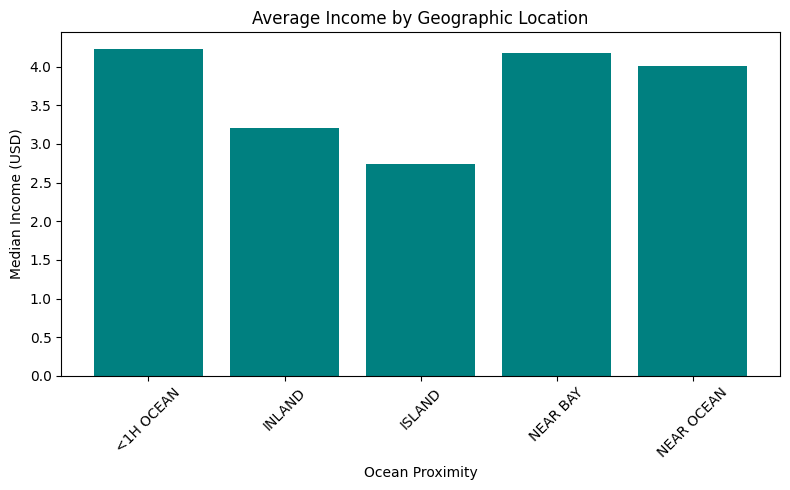

In [27]:
# میانگین درآمد بر اساس موقعیت جغرافیایی
income_by_location = df.groupby('ocean_proximity')['median_income'].mean()

plt.figure(figsize=(8, 5))
plt.bar(income_by_location.index, income_by_location, color='teal')

plt.title('Average Income by Geographic Location')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income (USD)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# جایگزین مقادیر خالی با میانه
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# تبدیل ستون غیر عددی به عددی برای اموزش مدل
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True, dtype=int)

C:\Users\Jbr\AppData\Local\Temp\ipykernel_18832\2861953976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [29]:
# تقسیم دیتا
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42 
)

In [ ]:
# ساخت مدل با استفاده از رگرسیون خطی بدون اسکلر
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
# out : R2: 0.6254240620553587

R2: 0.6254240620553587


In [31]:
# اسکلر کردن 
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# ساخت مدل با رگرسیون خطی با اسکلر
model = LinearRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print('R2:', r2_score(y_test, y_pred))
# out : R2: 0.6254240620553605

R2: 0.6254240620553605


In [ ]:
# ساخت مدل random forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
# out : R2: 0.8164888965922015

R2: 0.8164888965922015


In [ ]:
# تست مدل با داده های ورودی
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

# داده های رندوم برای تست پیش بینی مدل
entrance = [-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 0, 0, 1, 0]

t = np.array(entrance).reshape(1, -1)

y_pred = model.predict(t)

print('قیمت پیشبینی', y_pred[0])

قیمت پیشبینی 431413.33


c:\Users\Jbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


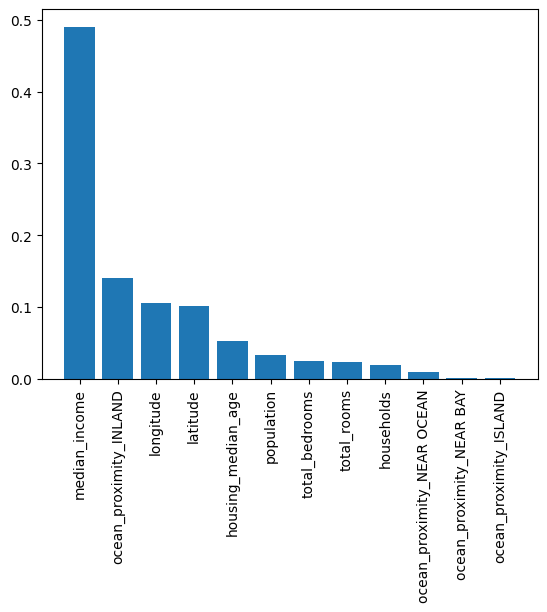

In [39]:
# کدام ستون بیشترین تاثیر را بر قیمت دارد
importances = model.feature_importances_
features = x.columns
indices = np.argsort(importances)[::-1]

plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.show()

In [ ]:
# ذخیره مدل
joblib.dump(model, 'housing.pkl')

['housing.pkl']